*Нотбук взять из курса Филипп Ульянкина по прикладной статистике, преподаваемого в ВШЭ и записанного для корсеры (<a href='https://github.com/FUlyankin/matstat-AB'>ссылка на репозиторий</a>).

----------------


# Случайные величины

<img src="data/ppilif_slides/1.png"/>

<img src="data/ppilif_slides/2.png"/>

<img src="data/ppilif_slides/3.png"/>

<img src="data/ppilif_slides/4.png"/>

<img src="data/ppilif_slides/5.png"/>

<img src="data/ppilif_slides/6.png"/>

<img src="data/ppilif_slides/7.png"/>

<img src="data/ppilif_slides/8.png"/>

<img src="data/ppilif_slides/9.png"/>

#  Симуляции случайных величин

В этой тетрадке мы поговорим как в python можно симулировать разные случайные величины и смотреть как они выглядят.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека дл работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')    # стиль графиков
%matplotlib inline

# 1. Генерация случайных величин в python


Иногда для решения задач по теории вероятностей или исследования свойств статистических алгоритмов нужно сгенерировать случайную выборку из какого-нибудь распределения. Чтобы сгенерировать в `python` любую случайную величину, нужно сделать две вещи: 

* Создать генератор. 

Внутри пакета `scipy.stats` есть [много разных распределений.](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) Среди всего этого обилия нужно найти нужное распределение и задать его параметры. Давайте сделаем это  на примере **нормального распределения**, $X \sim N(\mu, \sigma^2)$. Того самого распределения, плотность которого выглядит как: 

$$
f(x) = \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - \mu)^2}{2 \sigma^2}}
$$


Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$.

In [2]:
norm_rv = stats.norm(loc=0, scale=1)  # задали генератор 

Когда конкретный генератор готов, у него можно вызывать разные методы: 

* `rvs` сгенерирует нам выборку из распределения объёма `size`
* `cdf` вычислит для нас значение функции распределения (cumulative distribution function) в указанной точке
* `pdf` вычислит значение плотности распредеелния (probability density function) в указанной точке 
* `ppf` вычислит квантиль, указанного уровня

[В документации](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) можно найти и другие методы, но мы с ними практически не будем встречаться в течение нашего курса (см. разел statistical functions).

In [3]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:10]

array([-1.55994721,  0.19255561,  0.24924981, -0.61658986, -0.34975822,
        0.17852463,  0.68522137,  0.04165798,  0.90926698, -0.44481079])

# 2. Плотность и функция распределения


Теперь мы можем немного поэкспериментировать с нашей случайной величиной. Например, __мы можем узнать $f(1)$__.

In [4]:
norm_rv.pdf(1)

0.24197072451914337

Можем построить картинку для плотности распределения, $f(x)$. 

In [5]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

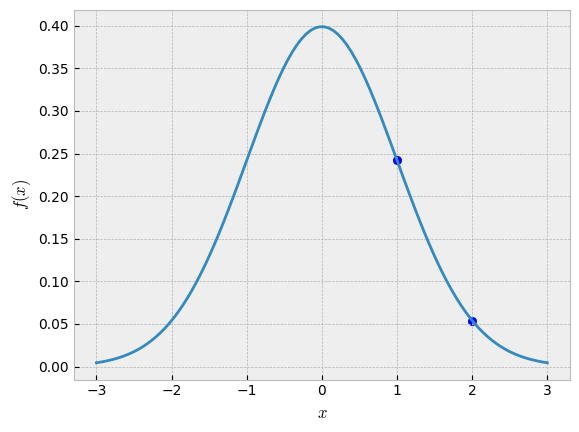

In [6]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,2], [norm_rv.pdf(1), norm_rv.pdf(2)], color="blue");

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [7]:
norm_rv.cdf(1)

0.8413447460685429

На плотности распределения это выглядит как площадь до точки $1$, то есть вероятность того, что $X \le 1$.

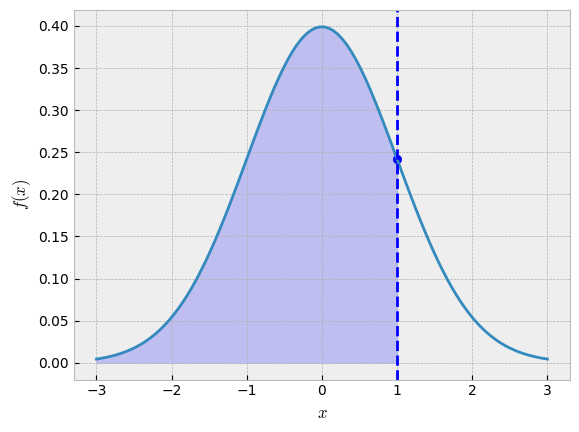

In [8]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1], [norm_rv.pdf(1)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-3, 1, 100)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

Можем построить картинку для функции распределения.

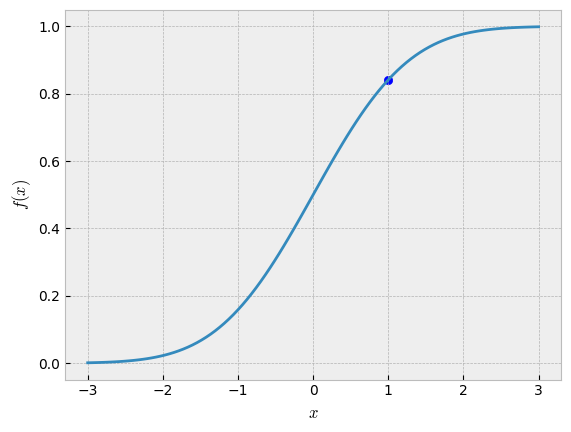

In [9]:
x = np.linspace(-3, 3, 100)
cdf = norm_rv.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [norm_rv.cdf(1)], color="blue");

А теперь найдём ещё одну вероятность:

$$ P(1 < X < 3) = \int_1^3 f(x) dx = F(3) - F(1)$$

In [10]:
norm_rv.cdf(3) - norm_rv.cdf(1)

0.15730535589982697

Это уже вероятность попасть в конкретный отрезок, изобразим её на плотности распределения. 

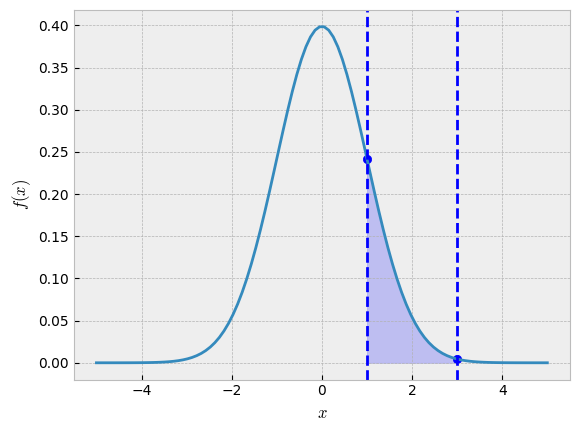

In [11]:
x = np.linspace(-5, 5, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1, 3], [norm_rv.pdf(1), norm_rv.pdf(3)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 3)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(3, color='blue', linestyle="--", lw=2);

Для полноты картины осталось только найти какой-нибудь квантиль. Квантиль уровня $\gamma$ это такое число $q$, что 

$$P(X \le q) = \gamma$$

Найдём $5\%$ и нарисуем его на картинке с плотностью:

In [12]:
q = norm_rv.ppf(0.1)
q = norm_rv.ppf(0.5)  # медиана
q

0.0

Text(0.9, 0.33511151553720353, '0.0')

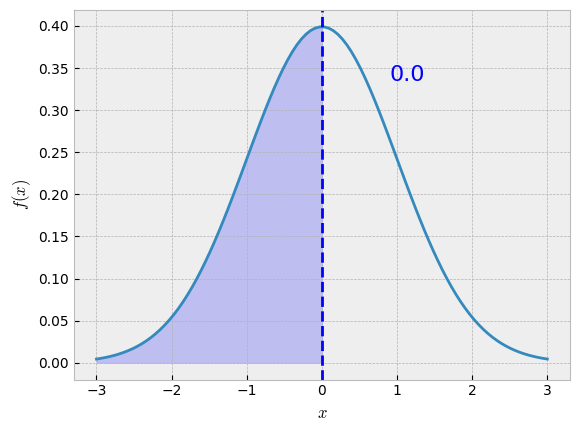

In [13]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-3, q)
yq = norm_rv.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.9, 0.8*y_max, round(q,2), color='blue', fontsize=16)

Обратите внимание, что всё, что мы сейчас делали - мы делали с теоретическим распределением. По аналогии можно работать с любым другим распределением. Например, с экспоненциальным: 

In [14]:
exp_rv = stats.expon(scale=5)
exp_rv.rvs(5)

array([3.52752385, 5.73559402, 5.20776518, 4.12428124, 0.58309347])

# 3. Эмпирическое распределение 

Давайте теперь поработаем с выборкой. Обычно мы не знаем из какого распределения она пришла к нам в руки. Мы можем посчитать какие-нибудь характеристики для нашей случайной величины.

In [15]:
sample[:10]

array([-1.55994721,  0.19255561,  0.24924981, -0.61658986, -0.34975822,
        0.17852463,  0.68522137,  0.04165798,  0.90926698, -0.44481079])

In [16]:
sample.shape

(1000,)

In [17]:
np.mean(sample)  # выборочное среднее(при больших n похоже на математическое ожидание)

-0.012770521010064961

In [18]:
np.var(sample)   # выборочная дисперсия

0.9763480249894839

In [19]:
np.std(sample)   # выборочное стандартное отклонение

0.9881032461182808

In [20]:
np.median(sample) # выборочная медиана

-0.02739929165566598

Построим гистограмму. Гистограмма - это эмпирическая оценка для плотности распределения. 

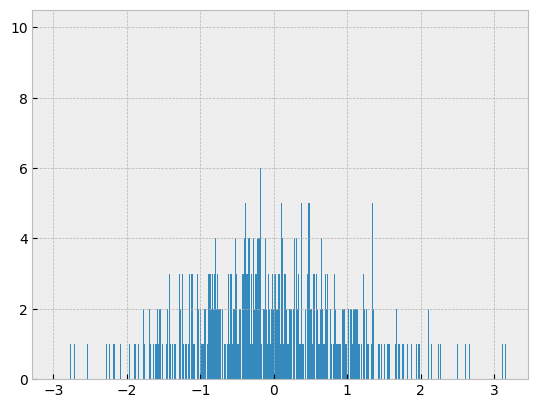

In [21]:
plt.hist(sample, bins=1000);  # bins отвечает за число столбцов

Нарисуем гистограмму и плотность на одной картинке. 

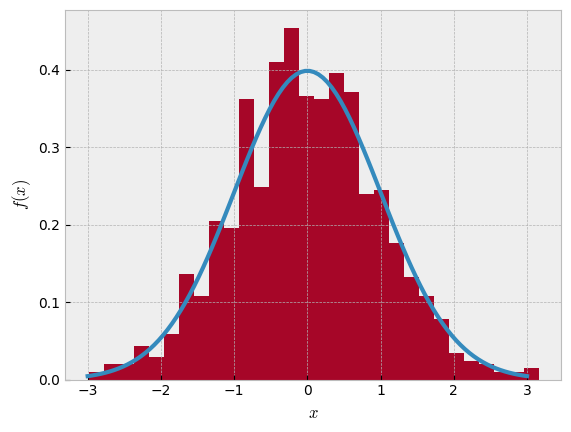

In [22]:
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=30, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

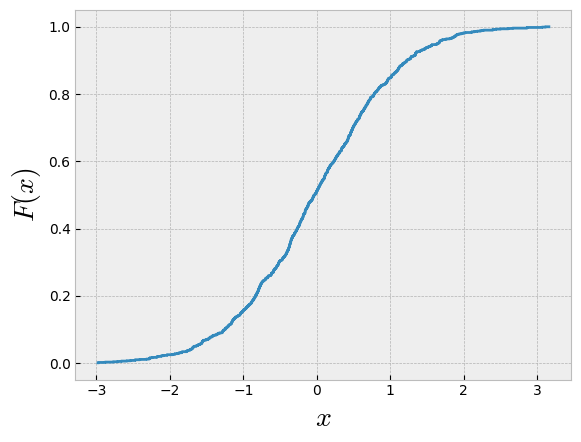

In [23]:
# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=20)
plt.xlabel('$x$', fontsize=20);

Можно нарисовать её на одной картинке с теоретической:

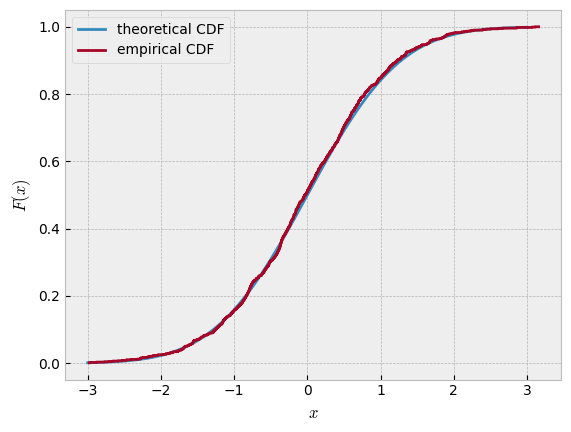

In [24]:
x = np.linspace(-3, 3, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# 4. Генерация выборок

С помощью таких же нехитрых манипуляций можно симулировать различные события. Например, можно сгенерировать выборку без повторений из вектора `1:10` размера `5`. Все элементы будут выбираться равновероятно.

Мы это будем делать [с помощью `np.random`.](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) Внутри numpy реализованы самые простые генераторы, и их, обычно, использовать довольно удобно. 

In [25]:
np.arange(1,11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
np.random.choice(np.arange(1,11), 
                 size=5,
                 replace=False) # выборка без повторений

array([10,  9,  4,  8,  7])

Можно делать генерации с повторениями, параметр `replace` базово равен `True`.

In [27]:
np.random.choice(np.arange(1,11), 
                 size=5,
                replace=True) # с повторениями

array([1, 4, 6, 7, 2])

А ещё можно самостоятельно расставить вероятности событий. Давайте, например устроим симуляцию рыбалки! 

In [28]:
np.random.choice(['карась', 'плотва', 'щука'], 
                 size=10, 
                 p=[0.5, 0.2, 0.3]) # с повторениями

array(['щука', 'карась', 'карась', 'щука', 'карась', 'карась', 'щука',
       'плотва', 'карась', 'карась'], dtype='<U6')

# 5. Зёрна 

Если выполнить команду `stats.norm(loc=3, scale=2).rvs(5)` на двух разных компьютерах или два раза на одном и том же, то результат будет разный. Не зря же они случайные :)

In [29]:
rv = stats.norm(loc=3, scale=2)
rv.rvs(5)

array([0.78796928, 3.55967544, 1.0064388 , 2.22000334, 1.61243945])

In [30]:
stats.norm(loc=3, scale=2).rvs(5)

array([5.65979992, 4.94426099, 9.67507546, 4.18998171, 2.24138177])

Однако генерирование случайных величин никак не противоречит идее абсолютно точной воспроизводимости исследований. Для того, чтобы получились одинаковые результаты, необходимо синхронизировать генераторы случайных чисел на этих двух компьютерах. Делается это путём задания зерна генератора случайных чисел (seed). Зерно также называют стартовым значением. В качестве зерна подойдёт любое целое число.

In [31]:
stats.norm(loc=3, scale=2).rvs(5, random_state=111)

array([0.73232333, 3.76863839, 5.99310755, 2.28923541, 1.42493292])

__Угадайте, какие числа чаще всего используют для зёрен?__

Многие алгоритмы в анализе данных в какой-то степени основаны на случайности (например в самом начале обучения веса берутся из какого-то распределения или обучение идёт на случайной подвыборке). Чтобы добиться воспроизводимых, одинаковых результатов, не зависящих от запуска, нужно устанавливать зерно генерации. 

---------------

# Нормальное распределение и его друзья

В этом блокноте мы посмотрим на то, как выглядят основные распределения, встречаемые в статистике.

---------------

In [32]:
import numpy as np
import scipy.stats as sts

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. Нормальное распределение 

Уже знакомы. Часто встречается на практике из-за ЦПТ. Давайте просто нарисуем плотности нормального распределения при разных $\mu$ и $\sigma$. 

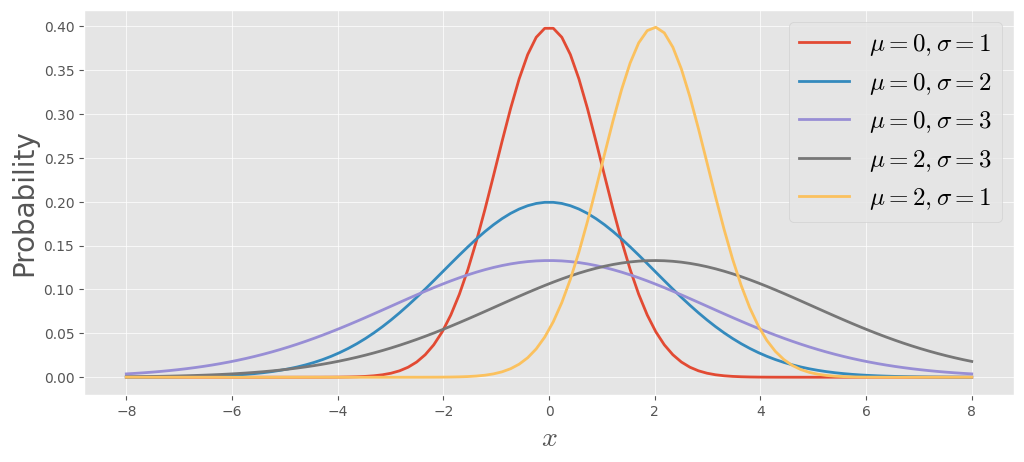

In [33]:
plt.figure(figsize=(12, 5))

x = np.linspace(-8,8,100)

par = [(0,1),(0,2),(0,3),(2,3),(2,1)]

for mu,sigma in par:
    rv = sts.norm(mu,sigma)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$\mu={},\sigma={}$".format(mu,sigma))


plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

__Когда встречается на практике?__   

Мы постоянно будем считать средние. Любое среднее благодаря ЦПТ имеет асимптотически нормальное распределение. Позже мы найдём его математическое ожидание и дисперсию и обобщим ЦПТ на более сложные случаи. 

# 2. Распределение Хи-квадрат

Пусть случайные величины $X_1, \ldots, X_k$ независимы и одинаково распределены. Причём нормально с параметрами $0$ и $1$. Обычно такой факт записывают следующим образом: 

$$
X_1, \ldots, X_k \sim iid \hspace{2mm} N(0,1).
$$ 

Буквы $iid$ расшифровываются как identically independently distributed (независимы и одинаково распределены).

__Определение:__  случайная величина $Y = X_1^2 + \ldots X_k^2$ имеет распределение хи-квадрат с $k$ степенями свободы. Кратко это записывают как $Y \sim \chi^2_k.$

Степень свободы это просто название для параметра распределения. Почему оно именно такое, мы обсудим позже. Сейчас давайте попробуем получить хи-квадрат из нормальной выборки. 

In [34]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина (5 степеней свободы)
x = norm_rv.rvs(5)
x = np.sum(x**2)
x

2.200591303497733

In [35]:
# хотим выборку из 1000 штук
x = norm_rv.rvs(size = (5, 1000)) 
x.shape

(5, 1000)

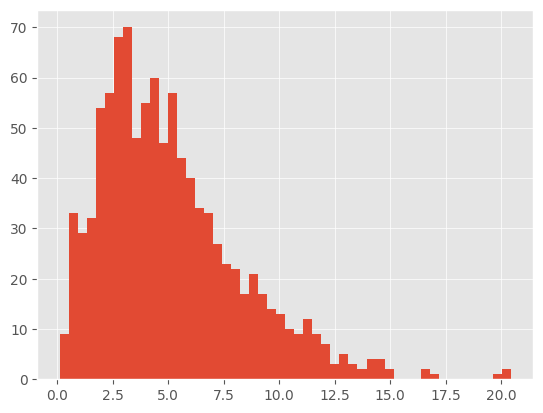

In [36]:
y = (x**2).sum(axis=0)
plt.hist(y, bins=50);

Внутри `scipy` уже есть готовая реализация $\chi^2_k$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. Из-за квадрата, случайная величина принимает только положительные значения. 

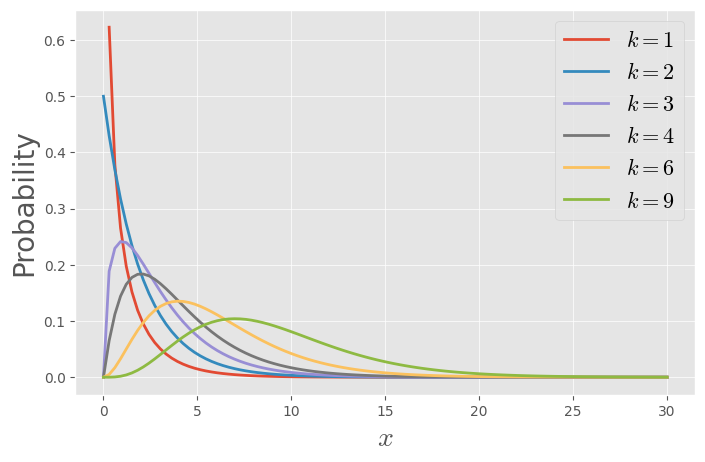

In [37]:
plt.figure(figsize=(8, 5))

x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
#plt.title("PDF ($\chi^2_k$)");

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

__Когда встречается на практике?__ Когда мы на первой неделе говорили про описательные статистики, мы упоминали, что выборочную дисперсию можно считать по формуле 

$$
\hat \sigma^2 = \bar{x^2} - \bar x^2.
$$

Ели выборка пришла к нам из нормального распределения, тогда $\bar{x^2}$ будет иметь $\chi^2_n$. Если немного поколдовать, можно убедиться, что для дисперсии тоже всплывает хи-квадрат распределение. В будущем мы это проделаем. 

# 3. Распределение Стьюдента

__Определение:__ Заведём ещё одну случайную величину $X_0$ со стандартным нормальным распределением. Пусть она низависима от $X_1, \ldots, X_k$. Тогда говорят, что случайная величина 

$$ Y = \frac{X_0}{\sqrt{\frac{\chi^2_k}{k}}} $$

имеет $t$-распределение стьюдента c $k-1$ степенью свободы, $Y \sim t (k-1)$. Снова попробуем получить это распределение из нормальной выборки. 

In [38]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина (4 степени свободы)
x0 = norm_rv.rvs(1)

x = norm_rv.rvs(5)
x = np.sum(x**2)
y = x0/np.sqrt(x/5)
y

array([-3.13975615])

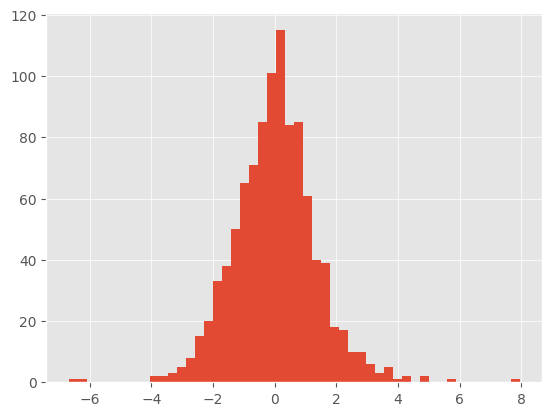

In [39]:
# хотим выборку из 1000 штук
x0 = norm_rv.rvs(1000)

x = norm_rv.rvs(size = (5, 1000)) 
x = (x**2).sum(axis=0)

y = x0/np.sqrt(x/5)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $t(k)$. Давайте посмотрим как плотность распределения будет выглядеть на картинке в зависимости от разных $k$. 

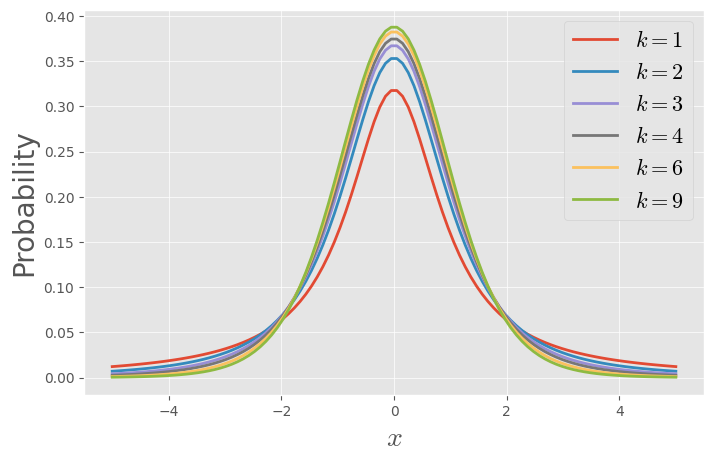

In [40]:
plt.figure(figsize=(8, 5))

x = np.linspace(-5,5,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.t(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

Важно заметить, что при росте $k$ распределение Стьюдента становится всё больше и больше похоже на нормальное. В будущем этот факт нам пригодится. 


__Когда встречается на практике?__  Довольно часто на практике мы будем получать выражение:

$$
\frac{\bar x}{\sqrt{ \frac{\hat \sigma^2}{n}}}.
$$

Мы знаем, что по ЦПТ у числителя нормальное распределение, а в знаменателе как раз стоит  $\sqrt{\frac{\chi^2_n}{n}}$. Значит в целом выражение будет иметь распределение Стьюдента с $n-1$ степенью свободы.

# 4. Распределение Фишера

__Определение:__ случайная величина 

$$ Y = \frac{\frac{\chi^2_k}{k}}{\frac{\chi^2_m}{m}}$$

имеет распределение Фишера с $k$ и $m$ степенями свободы, $Y \sim F(k,m)$. Сгенерируем её! 

In [41]:
norm_rv = sts.norm(loc=0, scale=1)

# Одна такая случайная величина
k,m = 5,10
x1 = norm_rv.rvs(k)
x2 = norm_rv.rvs(m)

x1 = np.sum(x1**2)
x2 = np.sum(x2**2)

y = (x1/k)/(x2/m)
y

0.8923263308181445

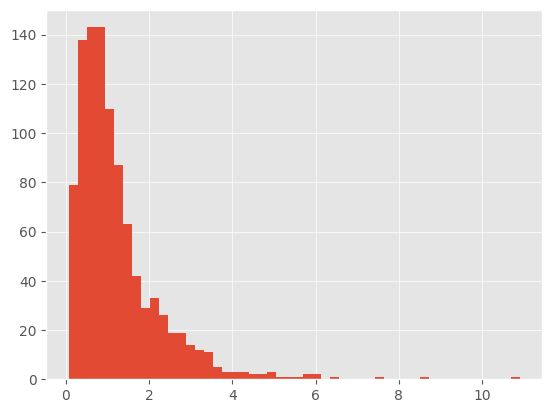

In [42]:
# хотим выборку из 1000 штук
k,m = 5,10
x1 = norm_rv.rvs(size = (k, 1000))
x2 = norm_rv.rvs(size = (m, 1000))

x1 = (x1**2).sum(axis=0)
x2 = (x2**2).sum(axis=0)

y = (x1/k)/(x2/m)

plt.hist(y, bins=50);

Снова внутри `scipy` уже есть готовая реализация $F(k,m)$.

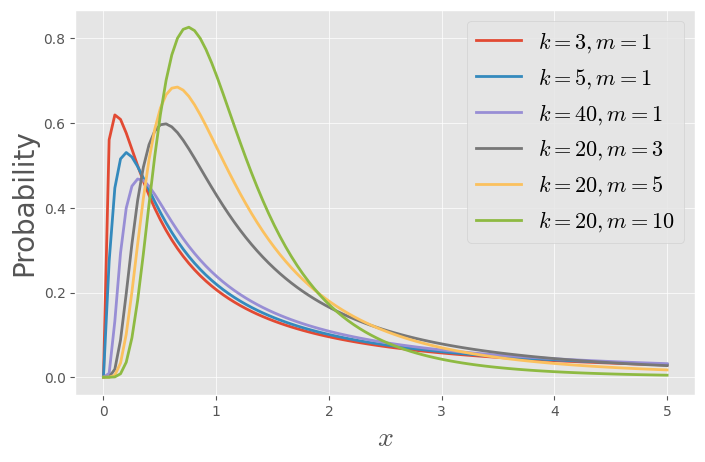

In [43]:
plt.figure(figsize=(8, 5))
x = np.linspace(0,5,100)

par = [(3,1),(5,1),(40,1),(20,3),(20,5),(20,10)]

for k,m in par:
    rv = sts.f(k,m)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k={},m={}$".format(k,m))
    
plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 16);

__Когда встречается на практике?__  Рано или поздно мы захотим сравнивать дисперсии. Там-то мы и встретимся с распределением Фишера. 

# 5. Тяжёлые хвосты 

Давайте нарисуем на одной картинке $N(0,1)$ и $t(1)$ распределения. 

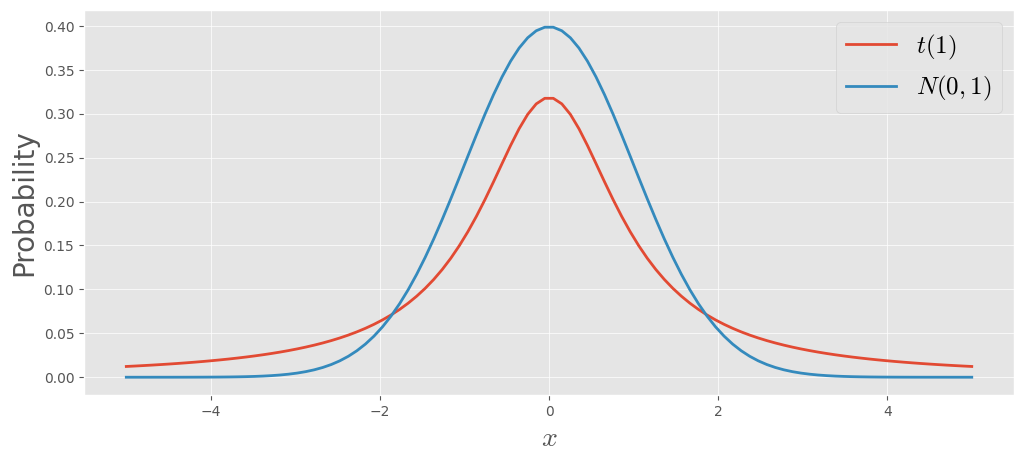

In [44]:
plt.figure(figsize=(12, 5))
x = np.linspace(-5,5,100)

plt.plot(x, sts.t(1).pdf(x), label="$t(1)$")
plt.plot(x, sts.norm(0, 1).pdf(x), label="$N(0,1)$")

plt.xlabel('$x$', fontsize=20)
plt.ylabel(r'Probability', fontsize=20)
plt.legend(fontsize = 18);

Посмотрите на эти две плотности. У красной хвосты лежат выше, чем у синей. Хвосты $t(1)$ тяжелее $N(0,1)$. Под ними находится большая вероятностная масса. Вероятность того, что очень большое, аномальное значение случайной величины, реализуется из распределения с тяжёлым хвостом, выше. 

In [45]:
# P(t(1) > 10)
np.mean(sts.t(1).rvs(1000) > 3)

0.098

In [46]:
# P(N(0,1) > 10)
np.mean(sts.norm(0,1).rvs(1000) > 3)

0.0

Главная проблема заключается в том, что по сравнению с количеством наблюдений из центральной части распределения, число наблюдений из хвостов, ничтожно мало. Из-за этого их постоянно недооценивают. __В статистике есть даже отдельные методы по работе с хвостами.__ 

# 6. Распределение Бернулли

<img src="data/ppilif_slides/10.png"/>

# 7. Биномиальное распределение

<img src="data/ppilif_slides/11.png"/>

<img src="data/ppilif_slides/12.png"/>

<img src="data/ppilif_slides/13.png"/>

---------------


#  Закон больших чисел


---------------

# 1. ЗБЧ

#### Слабая форма ЗБЧ (Пафнутий Львович Чебышёв)

Пусть $X_1, \ldots, X_n$ попарно независимые и одинаково распределённые случайные величины с конечным вторым моментом, $E(X_i^2) < \infty$, тогда имеет место сходимость:

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$


__Давайте нарисуем ЗБЧ.__ Мы знаем, что математическое ожидание игральной кости это $3.5$. Сделаем симуляцию: 

* подкинем кость 1 раз, посчитаем среднее число на ней
* подкинем кость 2 раза, посчитаем среднее число на ней

.....

* подкинем кость 100 раз, посчитаем среднее число на ней

Построим картинку для всех этих средних и убедимся в том, что оно и правда сходится к $3.5$.

In [47]:
n_obs = 100

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x

array([5, 3, 6, 2, 3, 6, 2, 1, 4, 6, 4, 2, 3, 1, 4, 2, 2, 4, 4, 2, 1, 1,
       6, 6, 5, 1, 1, 6, 4, 6, 3, 5, 4, 4, 4, 6, 6, 6, 5, 6, 5, 1, 1, 2,
       6, 3, 5, 5, 5, 3, 1, 3, 6, 4, 2, 6, 5, 2, 4, 1, 2, 2, 3, 4, 1, 4,
       6, 6, 1, 1, 4, 1, 6, 3, 2, 6, 5, 4, 2, 4, 1, 1, 2, 4, 5, 3, 3, 6,
       6, 6, 6, 1, 1, 4, 5, 6, 4, 3, 4, 5])

In [48]:
# считаем кумулятивную сумму
x_cumsum = np.cumsum(x)
x_cumsum[:5]

array([ 5,  8, 14, 16, 19])

In [49]:
np.arange(1, n_obs + 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [50]:
# делим на число наблюдений
x_mean = x_cumsum/np.arange(1, n_obs + 1)
x_mean

array([5.        , 4.        , 4.66666667, 4.        , 3.8       ,
       4.16666667, 3.85714286, 3.5       , 3.55555556, 3.8       ,
       3.81818182, 3.66666667, 3.61538462, 3.42857143, 3.46666667,
       3.375     , 3.29411765, 3.33333333, 3.36842105, 3.3       ,
       3.19047619, 3.09090909, 3.2173913 , 3.33333333, 3.4       ,
       3.30769231, 3.22222222, 3.32142857, 3.34482759, 3.43333333,
       3.41935484, 3.46875   , 3.48484848, 3.5       , 3.51428571,
       3.58333333, 3.64864865, 3.71052632, 3.74358974, 3.8       ,
       3.82926829, 3.76190476, 3.69767442, 3.65909091, 3.71111111,
       3.69565217, 3.72340426, 3.75      , 3.7755102 , 3.76      ,
       3.70588235, 3.69230769, 3.73584906, 3.74074074, 3.70909091,
       3.75      , 3.77192982, 3.74137931, 3.74576271, 3.7       ,
       3.67213115, 3.64516129, 3.63492063, 3.640625  , 3.6       ,
       3.60606061, 3.64179104, 3.67647059, 3.63768116, 3.6       ,
       3.6056338 , 3.56944444, 3.60273973, 3.59459459, 3.57333

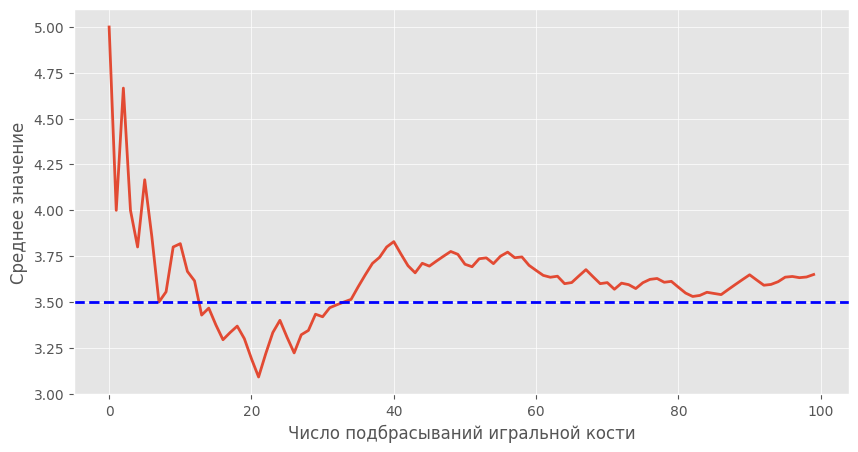

In [51]:
plt.figure(figsize=(10,5))
plt.plot(x_mean)
plt.axhline(3.5, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

# 2. Сходимость по вероятности

Увидели, что оно сходится? Вопрос только в том как именно. Над стрелкой в ЗБЧ есть буква $p$. 

$$
\frac{X_1 + \ldots + X_n}{n} \overset{p}{\to} E(X_1)
$$

Она означает, что последовательность случайных величин слева сходится к случайной величине справа по вероятности, то есть чем больше $n$ тем ближе вероятность отклонения $\bar x_n$ от $E(X)$ к нулю: 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon) \to 0
$$

Нарисуем её! Возьмём $\varepsilon = 0.01$, нарисуем на нашей картинке из предыдущего упражнения коридор $3.5 \pm \varepsilon$, продолжим ряд до $100000$ подбрасываний и увидим, как постепенно $\bar x_n$ попадает в коридор и всё реже выбивается из него. 

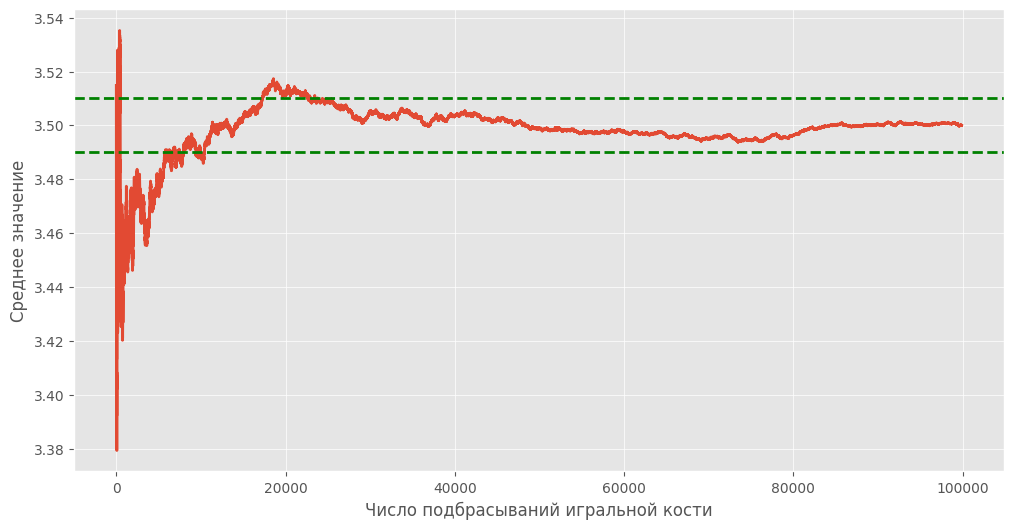

In [52]:
n_obs = 100000

# подкидываем кубик с повторениями много раз
x = np.random.choice(np.arange(1,7), size=n_obs) 
x_cumsum = np.cumsum(x)

x_mean = x_cumsum/np.arange(1, n_obs + 1)

eps = 0.01

plt.figure(figsize=(12,6))
plt.plot(x_mean[100:])
plt.axhline(3.5 + eps, color='g', linestyle='dashed', linewidth=2)
plt.axhline(3.5 - eps, color='g', linestyle='dashed', linewidth=2)

plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Можно попробовать оценить вероятность того, что последовательность из средних пробьёт на конкретном шаге установленный нами коридор. Для этого давайте сгенерируем много-много траекторий для игральной кости, как на картинке выше. А после посмотрим как часто на конкретном шаге эти траектории пробивают коридор $3.5 \pm \varepsilon$. Частота таких пробоин будет оценкой вероятности 

$$ 
P(\mid \bar x_n - 3.5 \mid \ge \varepsilon).
$$

In [53]:
n_obs = 10**4

# каждый раз подбрасываем кубик 1000 раз
x = np.random.choice(np.arange(1,7), size=(n_obs, 1000))

# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_cumsum = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_cumsum.shape

(10000, 1000)

In [54]:
x_cumsum

array([[6.        , 5.        , 4.        , ..., 1.        , 1.        ,
        2.        ],
       [4.        , 3.5       , 4.5       , ..., 3.        , 2.        ,
        4.        ],
       [4.66666667, 3.66666667, 4.66666667, ..., 4.        , 2.66666667,
        3.66666667],
       ...,
       [3.4874975 , 3.51690338, 3.49459892, ..., 3.4884977 , 3.49319864,
        3.4829966 ],
       [3.48754875, 3.51665167, 3.49454945, ..., 3.48844884, 3.49294929,
        3.48324832],
       [3.4877    , 3.5164    , 3.4947    , ..., 3.4882    , 3.4931    ,
        3.4835    ]])

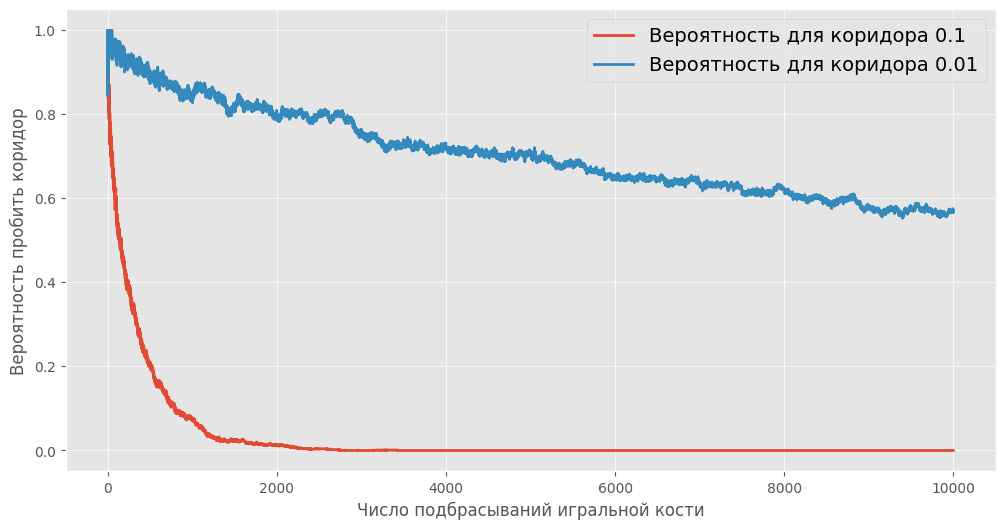

In [55]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_cumsum - 3.5) > eps1
bad_events_2 = np.abs(x_cumsum - 3.5) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1, label = f"Вероятность для коридора {eps1}")
plt.plot(proba_2, label = f"Вероятность для коридора {eps2}")
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор')
plt.legend(fontsize=14);

Как мы видим, вероятность пробить коридор поначалу является высокой, но постепенно убывает. При этом для более узкого коридора вероятность убывает медленнее, что логично :) 

Для нашей ситуации со сходимостью к константе можно построить аналогичные графики для дисперсии среднего. Немного позже мы её вычислим. Окажется, что это 

$$
Var(\bar x_n) = \frac{Var(X_1 + \ldots  + X_n)}{n^2} = \frac{Var(X_1)}{n}.
$$

В знаменателе у нас $n$. По мере роста выборки разброс убывает и среднее сходится к математическому ожиданию. __Важно держать в голове, что дисперсия убывает только при сходимости к константе!__

Давайте посмотрим на то как все три картинки выглядят рядом. На них нарисовано, как среднее $\bar x$, посчитанное по выборке $x_1, \ldots, x_n \sim iid N(2,1),$ сходится по вероятности к $2$. 

<center>
<img src="data/animation_prob_conv.gif" width="1800"> 
</center>

## 3. Расходимость  по вероятности


Теперь мы знаем как выглядит сходимость по вероятности. Интересно было бы посмотреть как выглядит её отсутствие.

Распределение Коши тот ещё фрукт. У стандартного распределения Коши такая плотность: 

$$
f_X(x) = \frac{1}{\pi(1+x^2)}
$$

Выглядит красиво. Красота, при этом, приносит нам кучу проблем. Одна из таких проблем - это отсутствие математического ожидания и дисперсии. ЗБЧ говорит нам, что для некоторых распределений 

$$ 
P( \mid \bar x - E(X)\mid \ge \varepsilon  ) \to 0, 
$$

то есть выборочное среднее по вероятности сходится к математическому ожиданию. Интересно было бы узнать к чему будет сходиться выборочное среднее для распределения Коши __(математического ожидания то не существует).__ 

Построим для выборочного среднего распределения Коши картинку, которую мы строили при иллюстрации ЗБЧ чуть выше. 

In [56]:
cauchy_rv = sts.cauchy()  # генератор 

n_obs = 10**4

# 1000 траекторий по n_obs шагов
x = cauchy_rv.rvs(size = (n_obs,1000))
x.shape

(10000, 1000)

In [57]:
# по строкам считаем кумялятивную сумму 
x_cumsum = np.cumsum(x, axis = 0)

# находим средние
x_mean = x_cumsum/np.arange(1, n_obs + 1)[:,None]
x_mean.shape

(10000, 1000)

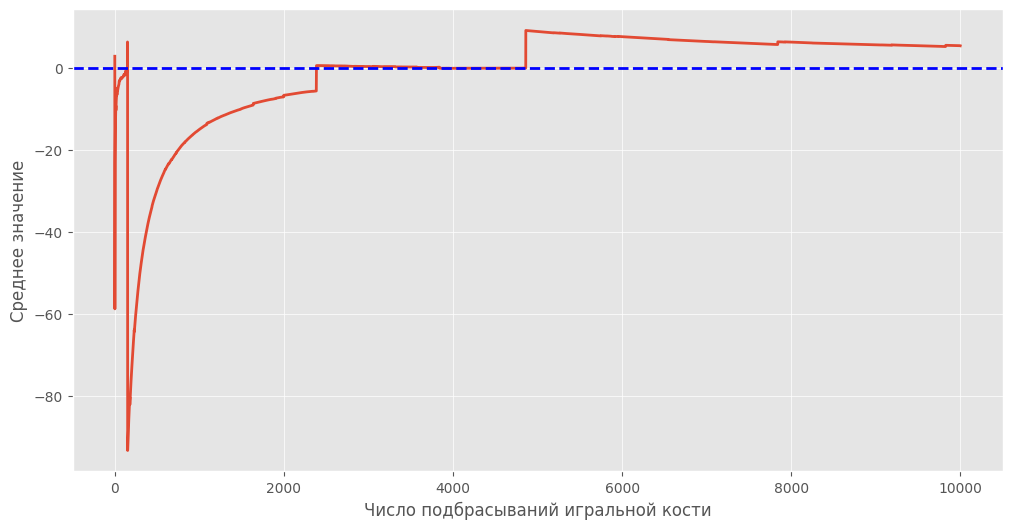

In [58]:
# Нарисуем одну любую траекторию

plt.figure(figsize=(12,6))
plt.plot(x_mean[:,442])
plt.axhline(0, color='b', linestyle='dashed', linewidth=2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Среднее значение');

Тут может банально повести и траектория будет визуально выглядеть хорошо. Но что происходит с вероятностями? 

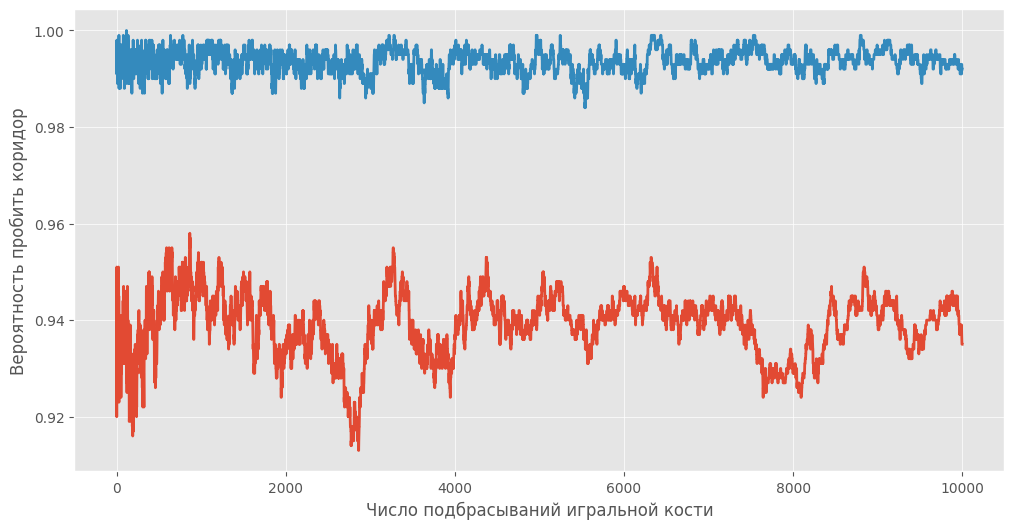

In [59]:
eps1 = 0.1
eps2 = 0.01

# все события, когда пробили коридор 
bad_events_1 = np.abs(x_mean - 0) > eps1
bad_events_2 = np.abs(x_mean - 0) > eps2

# вероятность пробоины 
proba_1 = np.mean(bad_events_1, axis=1)
proba_2 = np.mean(bad_events_2, axis=1)

plt.figure(figsize=(12,6))
plt.plot(proba_1)
plt.plot(proba_2)
plt.xlabel('Число подбрасываний игральной кости')
plt.ylabel('Вероятность пробить коридор');

Никакого движения к нулю. Постоянные пробоины в нашем коридоре. При этом во времени их количество никак не уменьшается. Так выглядит отсутствие сходимости по вероятности. Обратите внимание, что величина пробоины не очень важна. В случае, когда сходимость есть, пробоины также могут быть очень большими, но они происходят всё реже.

Давайте посмотрим на то как все три картинки выглядят рядом. На них изобразим первые $200$ шагов для распределения Коши. Чисто визуально сравните с первыми $200$ шагами для нормального распределения из предыдущего упражнения и ужаснитесь. 

<center>
<img src="data/animation_prob_unconv.gif" width="1400"> 
</center>


---------------

#  Центральная предельная теорема


---------------

# 1. Центральная предельная теорема


#### ЦПТ

Пусть $X_1, \ldots, X_n$ случайные величины, имеющие одинаковое распределение с конечными математическим ожиданием и дисперсией. Обычно этот факт записывают вот так:

$$
X_1, \ldots, X_n \sim iid(\mu,\sigma^2)
$$

тогда при $n \to \infty$ имеет место сходимость по распределению: 

$$
\frac{X_1 + \ldots X_n - \mu \cdot n}{\sqrt{n} \sigma } \overset{d}{\to} N(0,1)
$$


__Простым языком:__ 

* При определённых условиях сумма достаточно большого числа случайных величин имеет распределение близкое к нормальному 
* __Главное,__ чтобы случайные величины были похожи и не было такого, что одна резко выделяется на фоне остальных 


## Упражнение (ЦПТ для равномерного) 

Пусть $X \sim U[-1;1]$, пусть $Y = X_1 + \ldots + X_n$ 

* Нарисуем гистограмму для $X_1$, $X_1 + X_2$,  $X_1 + X_2 + X_3$ и $X_1 + X_2 + X_3 + X_4$.
* На последней картинке нарисуем плотность распределения $N(0,1)$ и визуально сравним, насколько сильно оно отличается от гистограммы. 

In [60]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = sts.uniform(-1, 2)

In [61]:
x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)
x_4 = uniform_rv.rvs(n_obs)

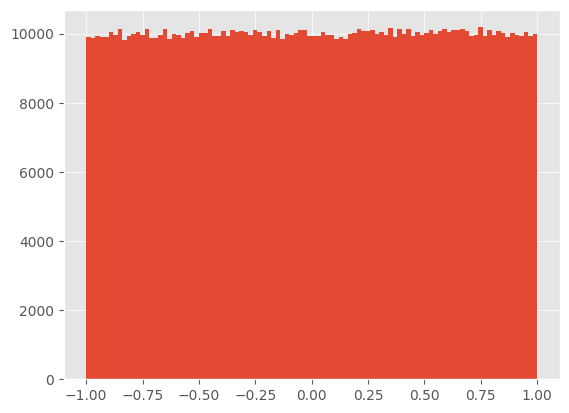

In [62]:
plt.hist(x_1, bins=100); # равномерное распределение

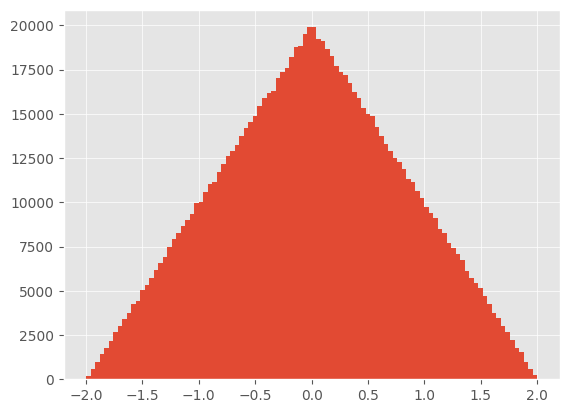

In [63]:
plt.hist(x_1 + x_2, bins=100); # треугольное распределение

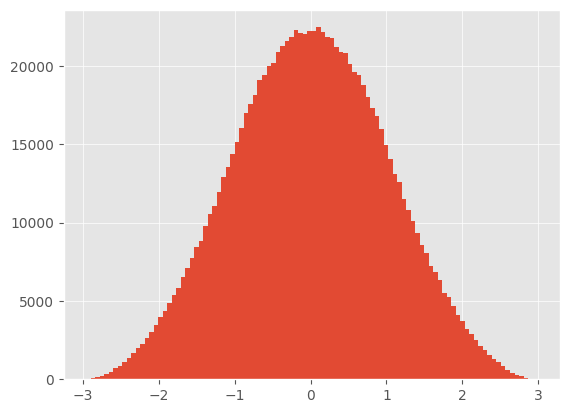

In [64]:
plt.hist(x_1 + x_2 + x_3, bins=100); # уже прослеживается купол

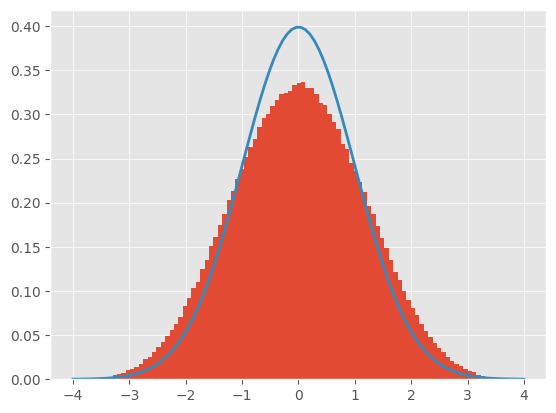

In [65]:
plt.hist(x_1 + x_2 + x_3 + x_4, bins=100, density=True); # ещё куполообразнее

# пририсуем нормальное распределение
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

На практике ЦПТ говорит нам, что при больших значениях $n$ мы можем заменять распределение средних нормальным и не особо сильно при этом ошибаться. 

Возникает вопрос: __А что такое большие значения n? Когда наступает асимптотика?__ Для разных распределений  и природных явлений она наступает по-разному. Для равномерного уже для четырёх слагаемых распределение довольно сильно напоминает $N(0,1)$.
 
Вот так равномерное распределение будет вести себя дальше: 

<center>
<img src="data/animation_CPT_1.gif" width="350"> 
</center>

А вот пример для хи-квадрат с одной степенью свободы: 

<center>
<img src="data/animation_CPT_2.gif" width="350"> 
</center>

Из довольно медленно сходящихся к нормальному распределений, наверное, можно выделить логнормальное распределение.

# 2. Сходимость по распределению

В ЦПТ над мы написали над стрелкой букву $d$. Она означает, что последовательность случайных величин сходится по распределению. 

__Определение:__ говорят, что последовательность случайных величин $X_1, X_2, \ldots$ сходится к случайной величине $X$ _по распределению,_ если $F_{X_n}(x) \to F_X(x)$ для всех $x$, в которых $F_X(x)$ непрерывна. Если функции сходятся, она есть. Если не сходятся, её нет.  

__Пример:__ распредеелние Стьюдента при большом $n$ (число степеней свободы) становится похоже на нормальное, то есть $t(n) \overset{d}{\to}  N(0,1)$.

Давайте это продемонстрируем: 

* Построим на картинке линию: плотность для $N(0,1)$.
* Построим пять пунктирных разноцветных линий: $t(1)$, $t(2)$, $t(5)$, $t(10)$, $t(50)$.
* Сделаем то же самое для функций распределения

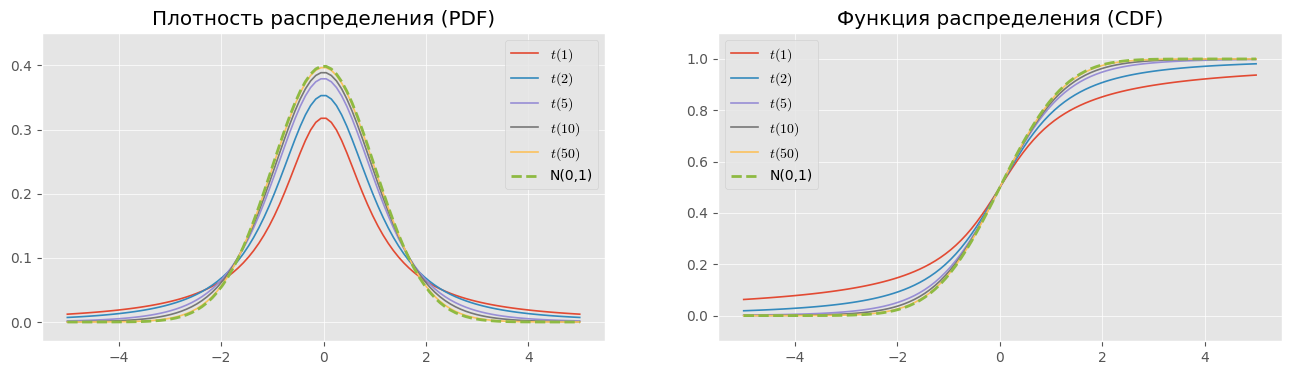

In [66]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots(1,2,figsize=(16, 4))

for k in [1, 2, 5, 10, 50]:    
    rv = sts.t(df=k)
    pdf = rv.pdf(x)
    cdf = rv.cdf(x) 
    ax[0].plot(x, pdf, label="$t(%s)$" % k, lw=1.2)
    ax[1].plot(x, cdf, label="$t(%s)$" % k, lw=1.2)


rv_limit = sts.norm( )
pdf_limit = rv_limit.pdf(x)
cdf_limit = rv_limit.cdf(x)

ax[0].plot(x, pdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[0].set_ylim(-0.03,0.45)
ax[0].set_title("Плотность распределения (PDF)")
ax[0].legend() 

ax[1].set_ylim(-0.1,1.1)
ax[1].plot(x, cdf_limit, label='N(0,1)', linestyle='dashed', lw=2)
ax[1].set_title("Функция распределения (CDF)")
ax[1].legend();

Конечно же держите гифку. Как же без неё: 

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/eds_spring_2020/master/sem08_estimate_convergence/image/animation_convdist_student.gif" width="1500"> 
</center>

<center>
<img src="data/animation_prob_unconv.gif" width="1400"> 
</center>


## Интерактивная визуализация сходимостей и тд:
https://seeing-theory.brown.edu/